# The aim of this short code is to demonstrate that in the limit of very large size of a neural network the output distribution of data is Gaussian.
We use a very simple forward NN with a single hidden layer.

If we use as input gaussian distributions with Mu=0 and STD=1 and we define the STD of the output layer as STD/hidden_size, then the minimum number of necessary neurons to have a final gaussian distribution is 3 (hidden_size = 3).

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest
from scipy.stats import norm
from scipy.optimize import curve_fit

2023-04-29 16:49:25.012852: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define the forward function to compute the output of the neural network
# You can choose the activation you prefer
def forward(X,i,activation):
    Z1 = tf.add(tf.matmul(X, W1[:,:,i]),< b1[:,i])
    A1 = activation(Z1)
    Z2 = tf.add(tf.matmul(A1, W2[:,:,i]), b2[:,i])
    #A2 = activation(Z2)
    #Z3 = tf.add(tf.matmul(A2, W3[:,:,i]),b3[:,i])
    #A3 = activation(Z3)
    #Z4 = tf.add(tf.matmul(A3, W4[:,:,i]),b4[:,i])
    return Z2

In [170]:
# Define the dimensions of the NN
input_size = 1
hidden_size = 60
output_size = 1
Nboot = 10000

#Define parameters of the Gaussian distribution
STD = 10
Mu = 10

# Initialize the weights and the bias with random number distributed with a gamma function
W1 = tf.Variable(tf.random.normal([input_size, hidden_size, Nboot], mean=Mu, stddev=STD), name='W1')
b1 = tf.Variable(tf.random.normal([hidden_size, Nboot], mean=Mu, stddev=STD), name='b1')
W2 = tf.Variable(tf.random.normal([hidden_size, output_size, Nboot], mean=Mu, stddev=STD/hidden_size), name='W2')
b2 = tf.Variable(tf.random.normal([output_size, Nboot], mean=Mu, stddev=STD), name='b2')

W3 = tf.Variable(tf.random.normal([hidden_size, hidden_size, Nboot], mean=Mu, stddev=STD/hidden_size**2), name='W3')
b3 = tf.Variable(tf.random.normal([hidden_size, Nboot], mean=Mu, stddev=STD), name='b3')
W4 = tf.Variable(tf.random.normal([hidden_size, output_size, Nboot], mean=Mu, stddev=STD/hidden_size**3), name='W4')
b4 = tf.Variable(tf.random.normal([output_size, Nboot], mean=Mu, stddev=STD), name='b4')


print(b1.numpy()[0,:].shape)
print(W1.numpy().shape)
#print(W4)
print(W2.numpy().shape)
print(W3.numpy().shape)



# We compute the output for each event for an input
X = tf.constant([[30]], dtype=tf.float32)
output_array = []
for i in range (0, Nboot):
    Y = forward(X,i,tf.nn.relu)
    output_array.append(Y.numpy()[0][0])
print(len(output_array))
#print(output_array)

(10000,)
(1, 60, 10000)
(60, 1, 10000)
(60, 60, 10000)
10000


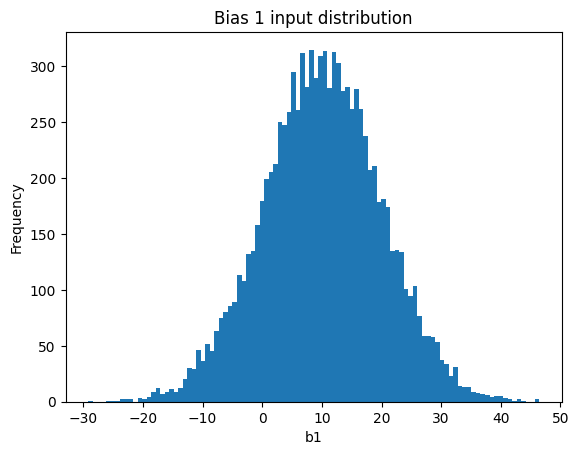

Data follow a gaussian distribution.


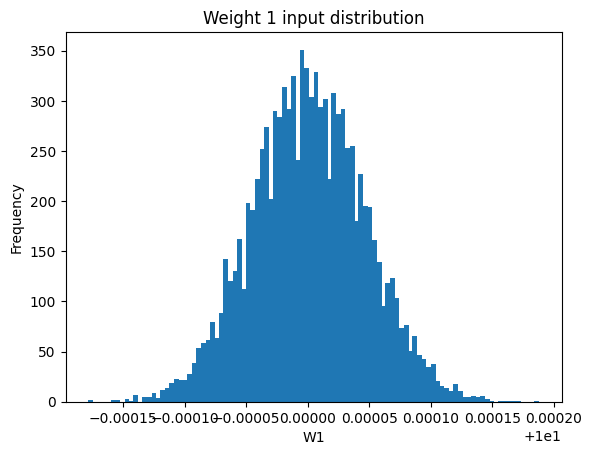

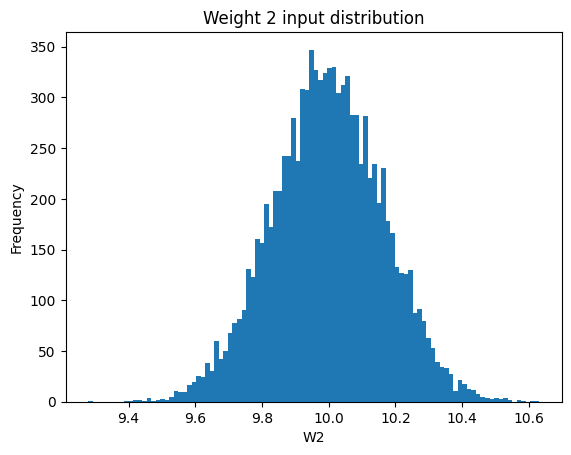

In [171]:
# Print the input distributions of the weights and bias
#print(b1.numpy()[0,:])
plt.hist(b1.numpy()[0,:], bins=100)
plt.xlabel('b1')
plt.ylabel('Frequency')
plt.title('Bias 1 input distribution')
plt.savefig('Bias1.png')
plt.show()

# Test of the gaussianity
stat, p = normaltest(b1.numpy()[0,:])

# Print the result of the test
if p < 0.05:
    print("Data don't follow a gaussian distribution.")
else:
    print("Data follow a gaussian distribution.")

plt.clf()

plt.hist(W4.numpy()[0,0,:], bins=100)
plt.xlabel('W1')
plt.ylabel('Frequency')
plt.title('Weight 1 input distribution')
plt.show()

plt.clf()

plt.hist(W2.numpy()[0,0,:], bins=100)
plt.xlabel('W2')
plt.ylabel('Frequency')
plt.title('Weight 2 input distribution')
plt.show()

Gaussian distribution.


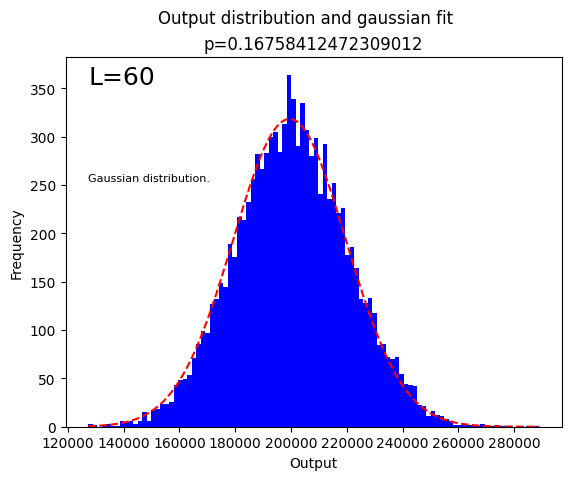

Mean: 199474.95191735256
Standard deviation: -20228.016899882063
Amplitude: 318.22569839133183


In [172]:
# Test of the gaussianity
stat, p = normaltest(output_array)

# Print the result of the test
if p < 0.05:
    string = "No gaussian distribution." 
    print(string)
else:
    string = "Gaussian distribution."
    print(string)

# Take parameters of our histogram
counts, bins, _ = plt.hist(output_array, bins=100)

ylim = max(counts)-10
xlim = min(bins)
xlim2 = max(bins)

# Define the Gaussian function
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))


# Plot the histogram and the fitted Gaussian function
plt.clf()
x = np.linspace(xlim, xlim2, 1000)
plt.hist(output_array, bins=100, color ='blue')
plt.xlabel('Output')
plt.ylabel('Frequency')
plt.suptitle('Output distribution and gaussian fit')
plt.title('p='+ str(p))
p0 = [(xlim+xlim2)/2, xlim2-xlim, 1]
coeff, var_matrix = curve_fit(gaussian, bins[:-1], counts, p0=p0)
plt.plot(x, gaussian(x, *coeff), 'r--', label='fit')    
    
plt.text(xlim-6, ylim, 'L='+ str(hidden_size), fontsize=18)
plt.text(xlim-6, ylim-100, string, fontsize=8)
plt.savefig('Output.png')
plt.show()

# Print gaussian parameters
print("Mean:", coeff[0])
print("Standard deviation:", coeff[1])
print("Amplitude:", coeff[2])